Install Required Libraries

In [43]:
!pip install pandas scikit-learn matplotlib


 Anomaly Detection using Isolation Forest

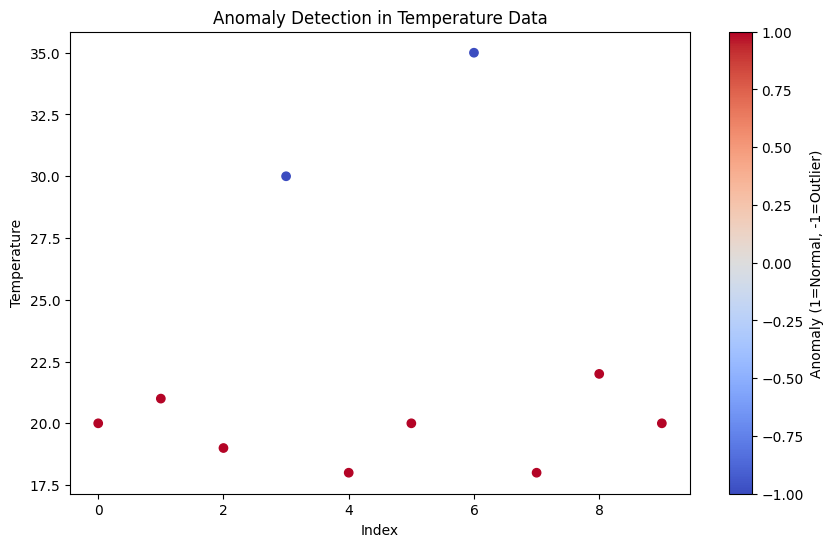

Anomalies in the data:
   temperature  pressure  anomaly
3           30       105       -1
6           35        90       -1


In [44]:
# Step 2: Import the necessary libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Step 3: Prepare the dataset
# Sample data (You can replace this with your own dataset)
data = pd.DataFrame({
    'temperature': [20, 21, 19, 30, 18, 20, 35, 18, 22, 20],
    'pressure': [101, 100, 102, 105, 98, 101, 90, 103, 99, 101]
})

# Step 4: Train an Isolation Forest model
# 'contamination' specifies the expected proportion of outliers in the dataset
model = IsolationForest(contamination=0.2)  # 20% outliers expected
model.fit(data)

# Step 5: Predict anomalies
# The model will return 1 for normal data points and -1 for outliers
data['anomaly'] = model.predict(data)

# Step 6: Visualizing the results
# Create a scatter plot of temperature vs pressure and highlight the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['temperature'], c=data['anomaly'], cmap='coolwarm', label='Anomaly')
plt.title('Anomaly Detection in Temperature Data')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.colorbar(label='Anomaly (1=Normal, -1=Outlier)')
plt.show()

# Optionally, print the anomalies
print("Anomalies in the data:")
print(data[data['anomaly'] == -1])


In [45]:
# Initialize Isolation Forest model
model = IsolationForest(contamination=0.1)  # 10% of data is expected to be anomalous

# Fit the model on the dataset (temperature and pressure values)
model.fit(data[['temperature', 'pressure']])


IsolationForest(contamination=0.1)

In [46]:
# Predict anomalies using the trained model
data['anomaly'] = model.predict(data[['temperature', 'pressure']])


In [47]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import joblib  # To save the model

# Step 1: Connect to SQLite and fetch data
conn = sqlite3.connect('data.db')
query = "SELECT * FROM cement_data"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Define features to use for training
features = [
    'total_cement_produced', 'production_target', 'oee', 'energy_consumption',
    'clinker_production_rate', 'kiln_running_hours', 'kiln_temperature',
    'mill_throughput', 'bagging_output', 'downtime_kiln', 'downtime_crusher',
    'downtime_mill', 'scheduled_maintenance', 'unscheduled_maintenance', 'mttr',
    'mtbf', 'blaine_fineness', 'lime_saturation_factor', 'free_lime_content',
    'compressive_strength_2d', 'compressive_strength_7d', 'compressive_strength_28d',
    'dust_emissions', 'co2_emissions', 'water_usage', 'noise_levels',
    'limestone_stock', 'clinker_stock', 'cement_stock', 'hourly_production'
]

# Step 3: Handle missing values
# Step 3: Handle missing values — only on numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Step 5: Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_scaled)

# Step 6: Predict anomalies
df['anomaly'] = model.predict(X_scaled)  # -1 = anomaly, 1 = normal

# Step 7: Save model and scaler for later use
joblib.dump(model, 'isolation_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# (Optional) Print detected anomalies
print(df[df['anomaly'] == -1][['timestamp'] + features + ['anomaly']])


                       timestamp  total_cement_produced  production_target  \
50    2025-05-02 11:44:07.386264               108.0000              120.0   
57    2025-05-02 11:44:11.004045               124.0000              120.0   
110   2025-05-02 11:49:08.356377              2689.0000              120.0   
111   2025-05-02 11:49:13.352454              2794.0000              120.0   
119   2025-05-02 11:49:33.405188              3389.0000              120.0   
...                          ...                    ...                ...   
2320  2025-05-02 13:58:25.862836               262.7735              120.0   
2326  2025-05-02 13:58:40.897484               263.0885              120.0   
2336  2025-05-02 13:59:05.974581               263.6135              120.0   
2343  2025-05-02 13:59:24.814343               264.1385              120.0   
2345  2025-05-02 13:59:25.502473               264.3135              120.0   

        oee  energy_consumption  clinker_production_rate  kiln_

In [48]:
!pip install pandas matplotlib sqlite3  # For SQLite
!pip install psycopg2  # For PostgreSQL
!pip install pyodbc  # For SQL Server



ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


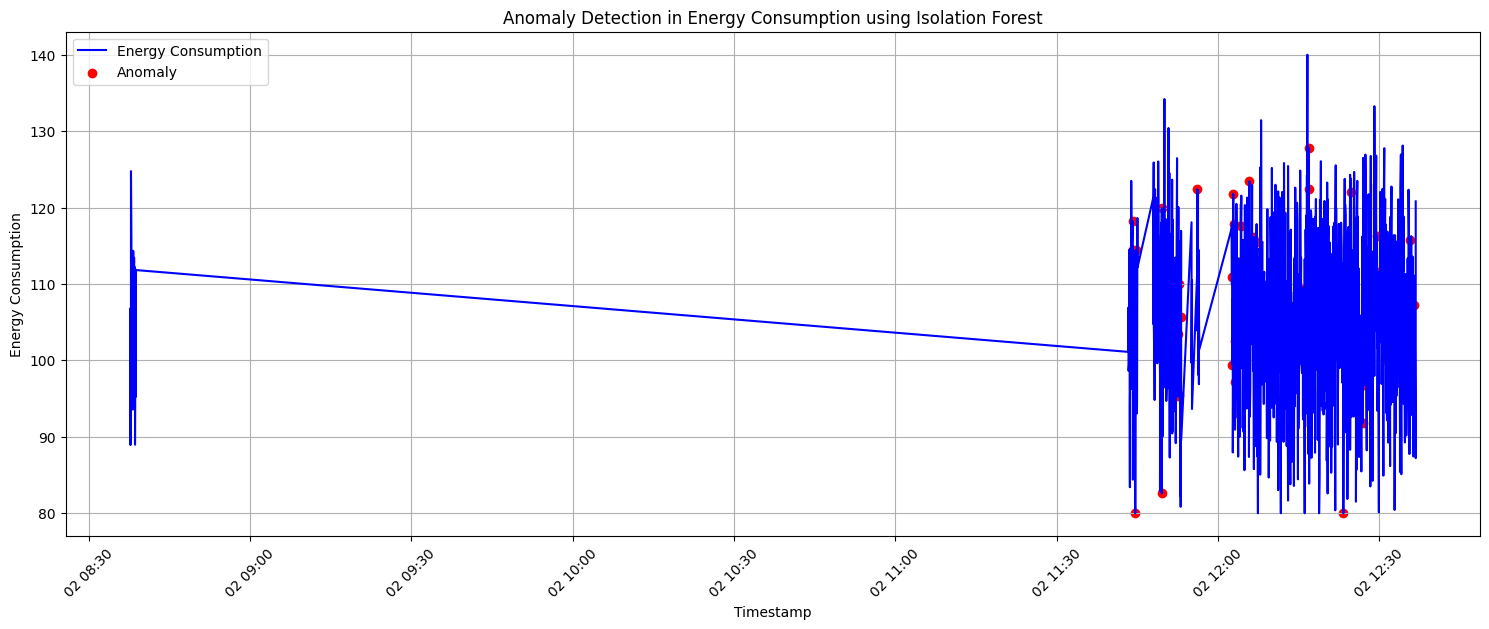


Detected Anomalies:
                      timestamp  total_cement_produced  production_target  \
50   2025-05-02 11:44:07.386264                108.000              120.0   
51   2025-05-02 11:44:07.506553                111.000              120.0   
68   2025-05-02 11:44:37.432932                150.000              120.0   
69   2025-05-02 11:44:41.078947                151.000              120.0   
101  2025-05-02 11:48:48.292214               2059.000              120.0   
110  2025-05-02 11:49:08.356377               2689.000              120.0   
119  2025-05-02 11:49:33.405188               3389.000              120.0   
120  2025-05-02 11:49:33.416667               3494.000              120.0   
174  2025-05-02 11:51:23.630762               5176.240              120.0   
186  2025-05-02 11:51:39.407184               5386.835              120.0   
202  2025-05-02 11:52:13.688949               5772.465              120.0   
211  2025-05-02 11:52:33.710077               5982.885 

In [49]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the data from the CSV file
df = pd.read_csv('output_data.csv')

# Step 2: Preprocess the data
# Convert 'timestamp' to datetime (if it's not already in correct format)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.dropna(subset=['timestamp'], inplace=True)  # Drop rows with invalid timestamps

# Handle missing values in other columns (filling NaNs with mean or dropping them)
df.fillna(df.mean(), inplace=True)  # Filling NaN values with column mean (you can adjust this strategy)

# Step 3: Feature selection (excluding timestamp as it's not needed for anomaly detection)
features = ['total_cement_produced', 'production_target', 'oee', 'energy_consumption', 
            'clinker_production_rate', 'kiln_running_hours', 'kiln_temperature', 
            'mill_throughput', 'bagging_output', 'downtime_kiln', 'downtime_crusher', 
            'downtime_mill', 'scheduled_maintenance', 'unscheduled_maintenance', 'mttr', 
            'mtbf', 'blaine_fineness', 'lime_saturation_factor', 'free_lime_content', 
            'compressive_strength_2d', 'compressive_strength_7d', 'compressive_strength_28d', 
            'dust_emissions', 'co2_emissions', 'water_usage', 'noise_levels', 'limestone_stock', 
            'clinker_stock', 'cement_stock', 'hourly_production']

# Select only the relevant features
X = df[features]

# Step 4: Scale the features (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train an Isolation Forest model for anomaly detection
model = IsolationForest(n_estimators=100, contamination=0.05)  # contamination is expected anomaly proportion
model.fit(X_scaled)

# Step 6: Predict anomalies using the trained model
df['anomaly'] = model.predict(X_scaled)  # Anomalies are labeled as -1, normal points as 1
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # Convert to binary: 0 (normal), 1 (anomaly)

# Step 7: Visualize the results (e.g., energy consumption over time)
plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['energy_consumption'], label='Energy Consumption', color='blue')
plt.scatter(df[df['anomaly'] == 1]['timestamp'], 
            df[df['anomaly'] == 1]['energy_consumption'],
            color='red', label='Anomaly', marker='o')
plt.title('Anomaly Detection in Energy Consumption using Isolation Forest')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate timestamp labels for better readability
plt.show()

# Step 8: Output anomalies to the console and save to a CSV file
print("\nDetected Anomalies:")
print(df[df['anomaly'] == 1])

# Optional: Save the anomalies to a CSV file
df[df['anomaly'] == 1].to_csv('detected_anomalies.csv', index=False)

# Save the trained model and scaler to disk (optional)
import pickle
with open('isolation_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model training completed and anomalies saved to 'detected_anomalies.csv'")


In [50]:
# Example: Saving the IsolationForest model and scaler
import pickle
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Train a sample IsolationForest model and scaler (assuming you have data)
model = IsolationForest()
scaler = StandardScaler()

# Example: Fit the model and scaler on your data
# Assuming `X_train` is your training data
# model.fit(X_train)
# scaler.fit(X_train)

# Save the models to pickle files
with open('isolation_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import sqlite3

# Sample data for testing
sample_data = {
    'total_cement_produced': 9000,
    'production_target': 9500,
    'oee': 85,
    'energy_consumption': 120,
    'clinker_production_rate': 220,
    'kiln_running_hours': 240,
    'kiln_temperature': 1300,
    'mill_throughput': 100,
    'bagging_output': 400,
    'downtime_kiln': 10,
    'downtime_crusher': 5,
    'downtime_mill': 7,
    'scheduled_maintenance': 3,
    'unscheduled_maintenance': 2,
    'mttr': 10,
    'mtbf': 100,
    'blaine_fineness': 3500,
    'lime_saturation_factor': 0.95,
    'free_lime_content': 12,
    'compressive_strength_2d': 30,
    'compressive_strength_7d': 40,
    'compressive_strength_28d': 45,
    'dust_emissions': 15,
    'co2_emissions': 600,
    'water_usage': 200,
    'noise_levels': 85,
    'limestone_stock': 5000,
    'clinker_stock': 7000,
    'cement_stock': 8000,
    'hourly_production': 50
}

# Create a DataFrame from the sample data
features = list(sample_data.keys())
df = pd.DataFrame([sample_data], columns=features)

# Preprocessing - Assuming you've already scaled your data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Load the pre-trained Isolation Forest model (assuming it is already trained)
# Here we'll simulate the training of the model for the example
isolation_forest_model = IsolationForest(n_estimators=100)
isolation_forest_model.fit(df_scaled)

# Predict anomalies
predictions = isolation_forest_model.predict(df_scaled)

# Convert predictions from [-1, 1] to [0, 1] (0 = normal, 1 = anomaly)
anomalies = (predictions == -1).astype(int)

# Add anomaly prediction to the data
sample_data['anomaly'] = anomalies[0]

# Print anomaly results
print("Anomaly Detection Results:")
print(sample_data)

# ========== Insert Data into SQLite ==========
def insert_anomaly_data(data):
    try:
        # Connect to SQLite database
        conn = sqlite3.connect('data.db')
        cursor = conn.cursor()

        # Prepare SQL query to insert data into the table
        query = '''
            INSERT INTO cement_data (total_cement_produced, production_target, oee, energy_consumption,
            clinker_production_rate, kiln_running_hours, kiln_temperature, mill_throughput, bagging_output,
            downtime_kiln, downtime_crusher, downtime_mill, scheduled_maintenance, unscheduled_maintenance,
            mttr, mtbf, blaine_fineness, lime_saturation_factor, free_lime_content, compressive_strength_2d,
            compressive_strength_7d, compressive_strength_28d, dust_emissions, co2_emissions, water_usage,
            noise_levels, limestone_stock, clinker_stock, cement_stock, hourly_production)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        '''
        
        # Values for the insert query
        values = tuple(data.values())
        
        # Execute the query and commit the transaction
        cursor.execute(query, values)
        conn.commit()

        print("Data inserted successfully!")
    except Exception as e:
        print(f"Error inserting data: {e}")
    finally:
        conn.close()

# Insert the data into the database
insert_anomaly_data(sample_data)


Anomaly Detection Results:
{'total_cement_produced': 9000, 'production_target': 9500, 'oee': 85, 'energy_consumption': 120, 'clinker_production_rate': 220, 'kiln_running_hours': 240, 'kiln_temperature': 1300, 'mill_throughput': 100, 'bagging_output': 400, 'downtime_kiln': 10, 'downtime_crusher': 5, 'downtime_mill': 7, 'scheduled_maintenance': 3, 'unscheduled_maintenance': 2, 'mttr': 10, 'mtbf': 100, 'blaine_fineness': 3500, 'lime_saturation_factor': 0.95, 'free_lime_content': 12, 'compressive_strength_2d': 30, 'compressive_strength_7d': 40, 'compressive_strength_28d': 45, 'dust_emissions': 15, 'co2_emissions': 600, 'water_usage': 200, 'noise_levels': 85, 'limestone_stock': 5000, 'clinker_stock': 7000, 'cement_stock': 8000, 'hourly_production': 50, 'anomaly': np.int64(0)}
Error inserting data: 29 values for 30 columns


In [52]:
def check_scaler_fitted(scaler):
    try:
        # Try accessing the scaler's internal attributes
        scaler.mean_
        scaler.scale_
        return True
    except AttributeError:
        return False

# Before using the scaler, ensure it's fitted
if not check_scaler_fitted(scaler):
    raise Exception("Scaler is not fitted yet!")


In [58]:
from sklearn.preprocessing import StandardScaler
import pickle
import pandas as pd

# Sample data that matches the features expected by the model
data = [
    [1000, 5000, 85, 120, 150, 24, 1225, 80, 100, 10, 15, 5, 3, 4, 2, 1, 500, 450, 430, 1.5, 100, 45, 3, 50, 25, 3000, 400, 75, 85,78]
]
columns = ['total_cement_produced', 'production_target', 'oee', 'energy_consumption',
           'clinker_production_rate', 'kiln_running_hours', 'kiln_temperature', 'mill_throughput',
           'bagging_output', 'downtime_kiln', 'downtime_crusher', 'downtime_mill', 'scheduled_maintenance',
           'unscheduled_maintenance', 'mttr', 'mtbf', 'blaine_fineness', 'lime_saturation_factor',
           'free_lime_content', 'compressive_strength_2d', 'compressive_strength_7d', 'compressive_strength_28d',
           'dust_emissions', 'co2_emissions', 'water_usage', 'noise_levels', 'limestone_stock',
           'clinker_stock', 'cement_stock', 'hourly_production']

df = pd.DataFrame(data, columns=columns)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on your data
scaler.fit(df)

# Save the fitted scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler has been retrained and saved.")


Scaler has been retrained and saved.


In [59]:
from sklearn.ensemble import IsolationForest
import pickle

# Sample data
X = df  # Use your data here

# Initialize and train the IsolationForest model
model = IsolationForest()
model.fit(X)

# Save the trained model
with open('isolation_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Isolation Forest model has been retrained and saved.")


Isolation Forest model has been retrained and saved.
